# 머신러닝을 이용한 맥북 중고가 예측
* 사용 연수를 입력받아서
* 중고가를 예측

In [1]:
import pandas as pd
from IPython.display import Image

## 데이터 불러오기 및 형태 파악

In [2]:
macbook = pd.read_csv('~/Aiffel_Project/Machine_Learning/macbook/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


## 데이터를 시각화(산점도)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

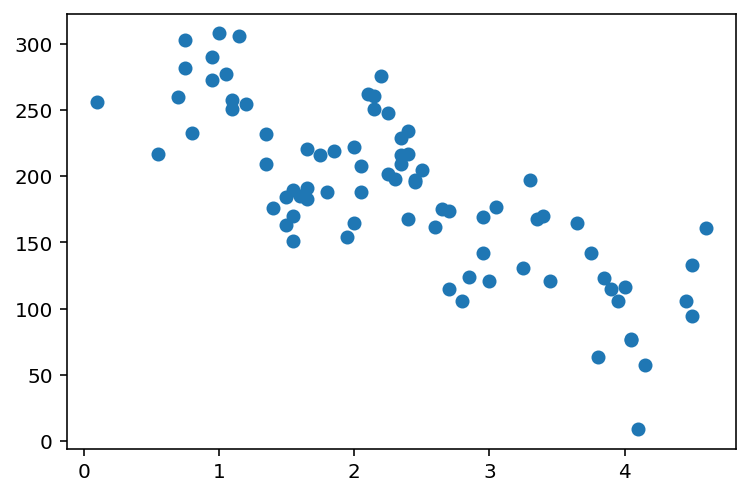

In [4]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

## 상관 계수
#### 상관 관계가 있으므로 상관 계수를 구하자

In [5]:
import numpy as np

np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

결과로 나온 행렬에서 (0,0), (1,1)은 자기 자신과의 상관계수를 나타내므로 1의 값을 도출함

## 모델 생성
>#### 입력(x)는 사용 연수가 될 것이며
>#### 결과(y)는 가격이 될 것이다.

* #### 아래는 산점도를 기반으로 그려본 모델 예측선
![image1](./image1.png)

In [6]:
x = macbook["used_years"].values
y = macbook["price"].values

# 사용연수(x)와 중고가격(y)

In [9]:
def model(x, w, b):
    y = w * x + b
    return y

# 일차함수 모델을 생성

In [7]:
w = 3.1
b = 2.3

# 임의의 가중치를 설정

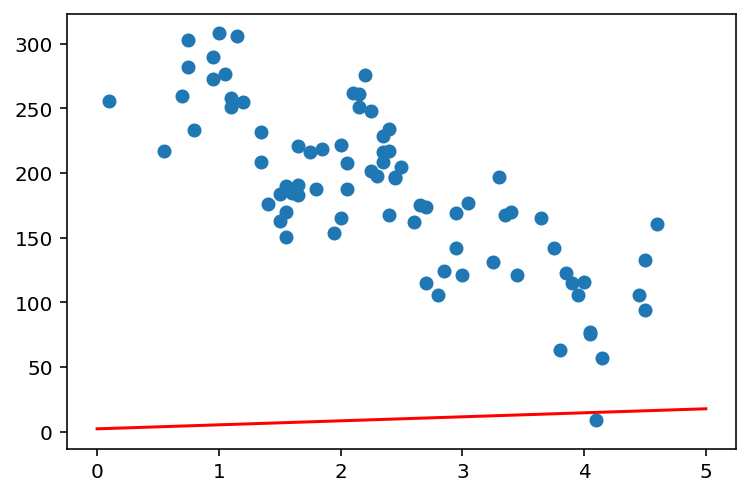

In [10]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 설정한 임의의 가중치가 전혀 맞지 않은 직선임
#### => 얼마나 틀린 답을 냈는지 알기 위해 error를 수치화해야 함

## 모델을 평가하자
* ### 오차(RMSE)

In [12]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

# 오차의 RMSE를 구하는 함수

In [15]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)

In [16]:
rmse = RMSE(predictions, y)
rmse

# 모델이 부정확하기 때문에 큰 값이 나옴

188.81322969819274

* ### 손실 함수

In [17]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

# 손실 함수

In [18]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

# 경사하강법을 적용하기 위해 미분값을 계산하는 gradient 함수를 선언

In [19]:
LEARNING_RATE = 1

# 하이퍼 파라미터인 학습률을 1로 정의

In [20]:
losses = []

# 오차를 저장할 빈 리스트 생성

### 학습 진행

In [21]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


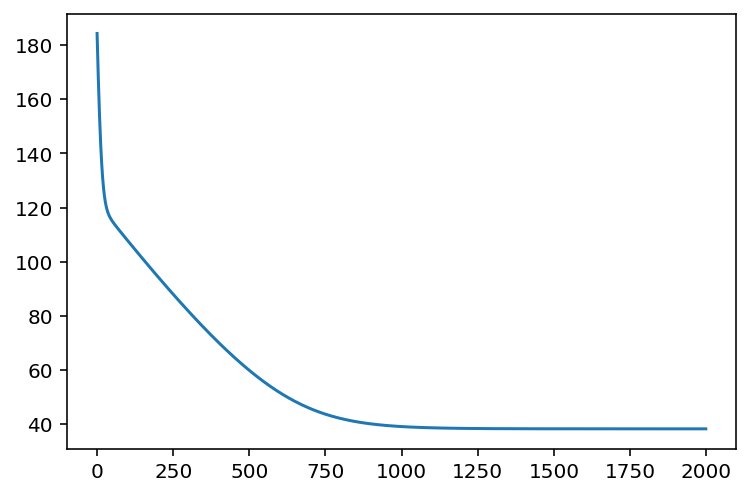

In [22]:
plt.plot(losses)
plt.show()

In [23]:
w, b

# 학습을 진행한 뒤 현재의 가중치 값을 확인

(-44.92756090768412, 293.0815786721102)

## 모델을 시각화

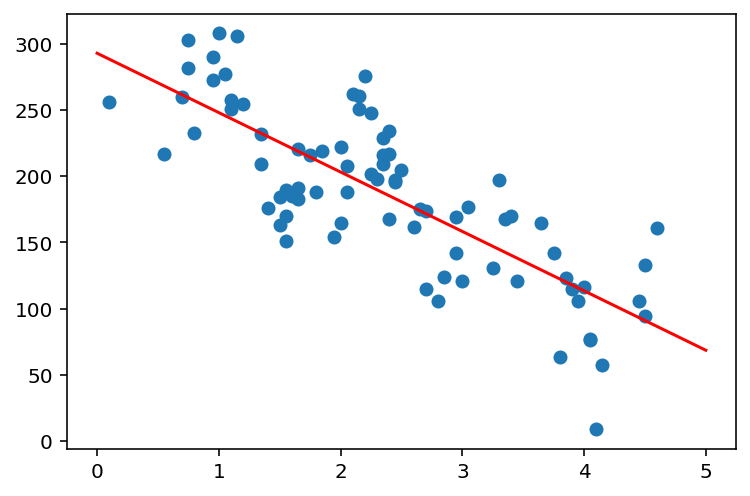

In [24]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

* * *

# 새로운 데이터인 macbook_test에 모델을 적용

In [25]:
test = pd.read_csv("~/Aiffel_Project/Machine_Learning/macbook/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [26]:
test_x = test['used_years'].values
test_y = test['price'].values

# 사용 연수(x)와 target인 중고가(y) 값을 설정
# 모델로 예측한 값이 y와 비슷하다면 모델이 성공적이라고 볼 수 있다.

## 모델 적용

In [27]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

# 만들어진 모델에 데이터셋을 입력
# 이후 새 컬럼 prediction을 만들어 함께 비교해 본다.

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [28]:
test['error'] = test['price'] - test['prediction']
test

# target값과 prediction을 빼서 오차를 구한 뒤 새 컬럼 error로 넣는다.

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [29]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

# RMSE 값을 도출

45.03918284717212

## 테스트 데이터 모델 시각화

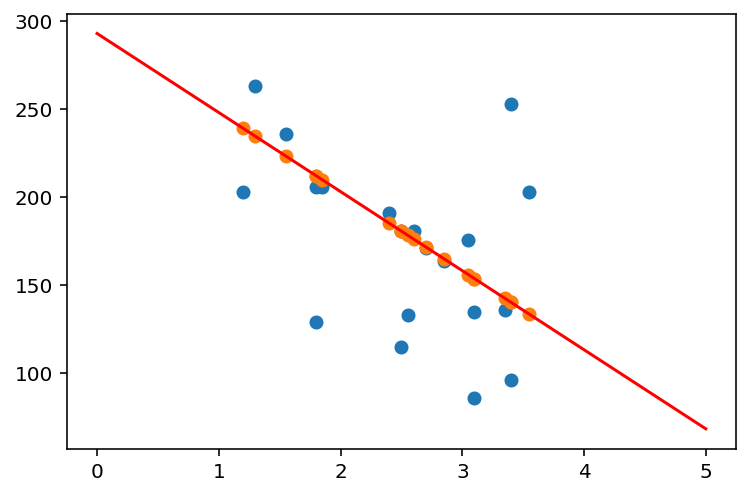

In [30]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()